In [1]:
#!pip install --user -U pip

In [2]:
#!pip install --user umap-learn

In [3]:
#!pip install --user -U seaborn

In [105]:
#!pip install --user biopython

In [3]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from umap import UMAP

In [4]:
embedding = np.load("example_embedding_1M.800k.npy")
embedding.shape

(1000000, 512)

In [5]:
latent = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=40))
]).fit_transform(embedding)
latent.shape

(1000000, 40)

In [6]:
window_size = 1000000
center = 3566700

# TODO: find an enhancer example

# TODO: find tranposon example

# would be nice to find an example of a certain protein domain or something interesting about a protein

def plot_latent(latent, start, end):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom.T)
    #plt.figure(figsize=(15, 15))
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        data=df2,
        cmap="bwr",
        center=0,
        square=False,
        yticklabels=1,
        cbar=False,
    )
    #plt.xlabel("pos")
    plt.xticks([], [])
    plt.yticks([], [])
    #plt.ylabel("embedding principal component");

## Promoter, exons
TODO: find better example without something weird on the far left

http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566700%2D3567700&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(1000, 40)


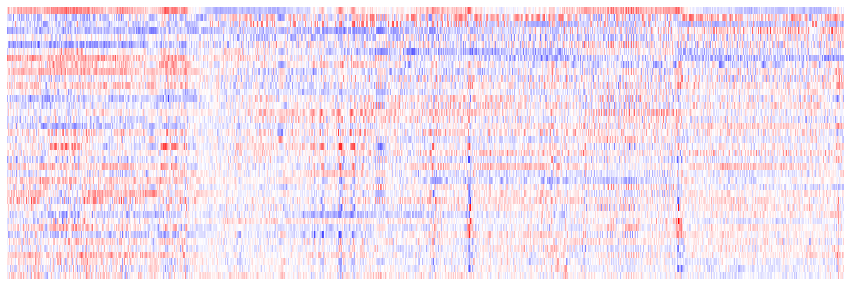

In [7]:
plot_latent(latent, 3566700, 3567700)

(1000, 512)
Running PCA on zoomed-in window
(1000, 40)


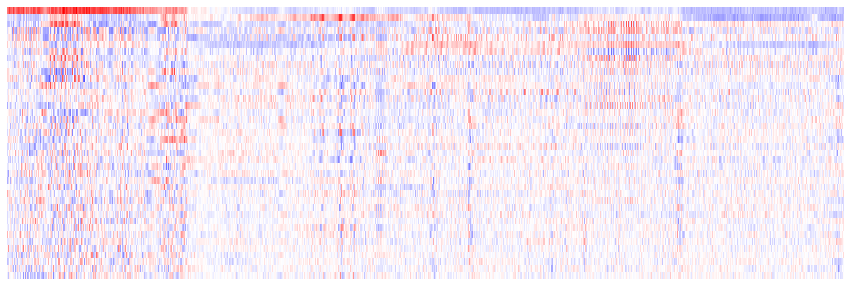

In [8]:
plot_latent(embedding, 3566700, 3567700)

# Example TFBS from FunTFBS
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3561938%2D3562102&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(164, 40)


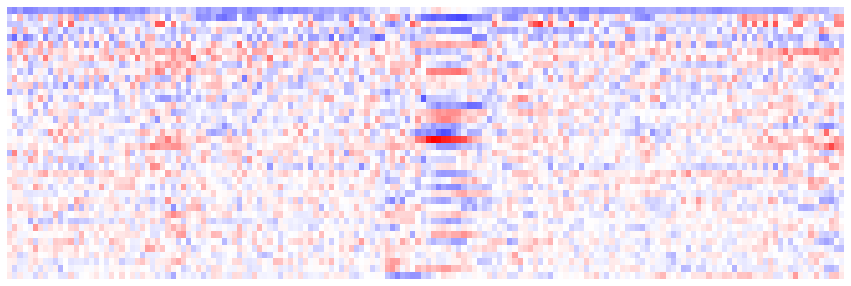

In [9]:
plot_latent(latent, 3561938, 3562102)

(164, 512)
Running PCA on zoomed-in window
(164, 40)


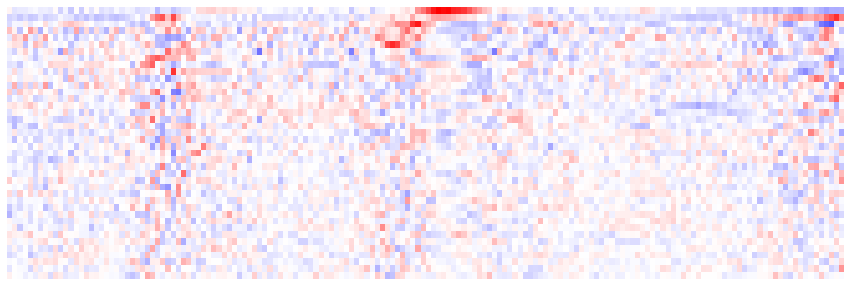

In [10]:
plot_latent(embedding, 3561938, 3562102)

## Start codon
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3567354%2D3567402&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(49, 40)


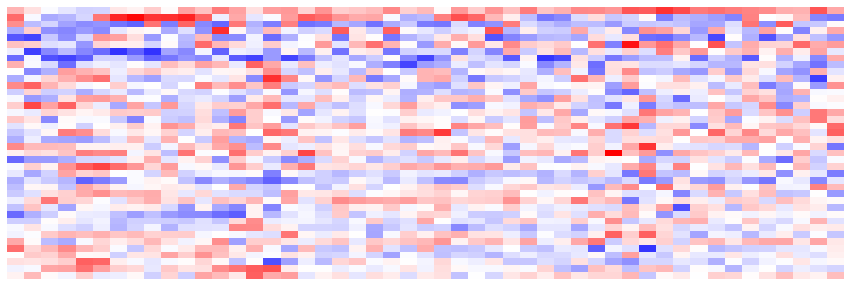

In [11]:
plot_latent(latent, 3567353, 3567402)

(49, 512)
Running PCA on zoomed-in window
(49, 40)


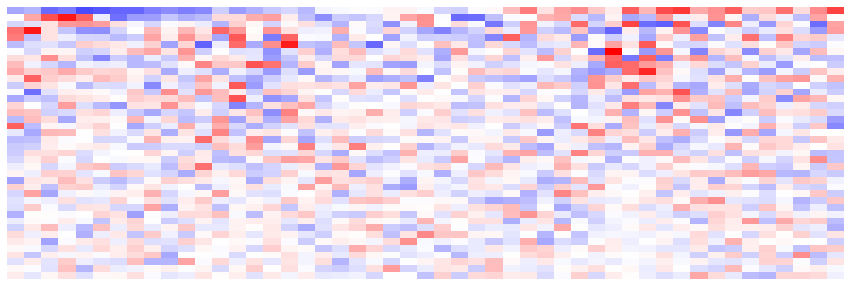

In [12]:
plot_latent(embedding, 3567353, 3567402)

## Alternative splicing
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3568832%2D3569781&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(950, 40)


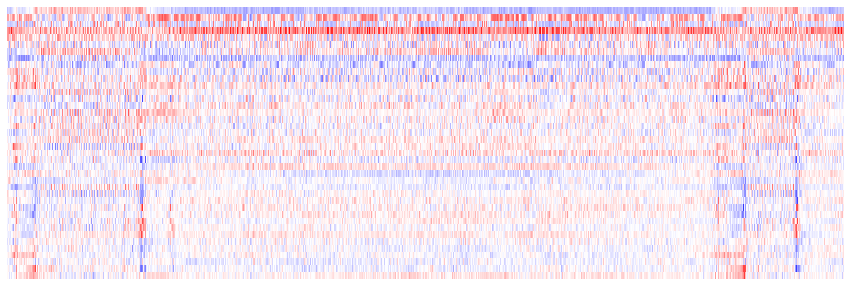

In [13]:
plot_latent(latent, 3568831, 3569781)

(950, 512)
Running PCA on zoomed-in window
(950, 40)


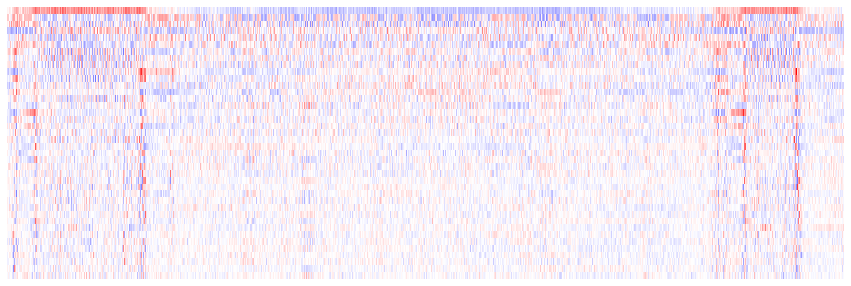

In [14]:
plot_latent(embedding, 3568831, 3569781)

## Gene on the negative strand. there's another thing interesting here, to inspect
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3557971%2D3558946&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(976, 40)


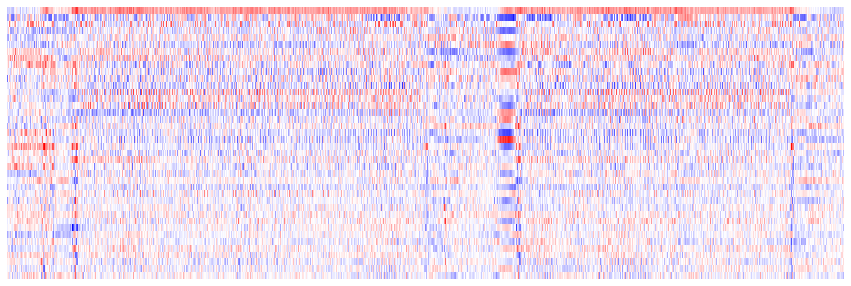

In [15]:
plot_latent(latent, 3557970, 3558946)

(976, 512)
Running PCA on zoomed-in window
(976, 40)


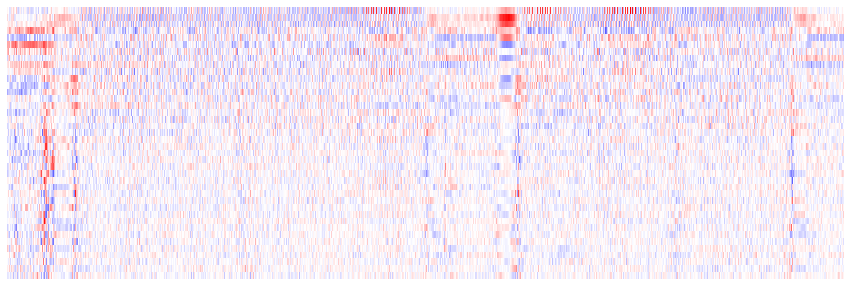

In [16]:
plot_latent(embedding, 3557970, 3558946)

In [83]:
for pc in range(1, 21):
    df_bedgraph = pd.DataFrame({
        "chromosome": ["chr5" for _ in range(len(latent_zoom))],
        "start": np.arange(start, end),
        "end": np.arange(start+1, end+1),
        "values": latent_zoom[:, pc-1],
    })
    print(df_bedgraph)

    with open(f'example_bedgraph_PC{pc}.txt', 'a') as file:
        file.write(f'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n')
        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)

    chromosome    start      end    values
0         chr5  3566700  3566701  0.844862
1         chr5  3566701  3566702  2.205046
2         chr5  3566702  3566703  1.499352
3         chr5  3566703  3566704  2.386457
4         chr5  3566704  3566705  2.151994
..         ...      ...      ...       ...
995       chr5  3567695  3567696 -2.108944
996       chr5  3567696  3567697 -0.441135
997       chr5  3567697  3567698  0.304019
998       chr5  3567698  3567699 -1.011496
999       chr5  3567699  3567700 -0.534138

[1000 rows x 4 columns]
    chromosome    start      end    values
0         chr5  3566700  3566701  1.109633
1         chr5  3566701  3566702  4.197469
2         chr5  3566702  3566703  3.764820
3         chr5  3566703  3566704  3.462405
4         chr5  3566704  3566705  1.246260
..         ...      ...      ...       ...
995       chr5  3567695  3567696  0.646177
996       chr5  3567696  3567697 -3.094267
997       chr5  3567697  3567698 -4.029203
998       chr5  3567698  3567

In [53]:
cluster = KMeans(n_clusters=10).fit_predict(latent)
cluster.shape

(1000000,)

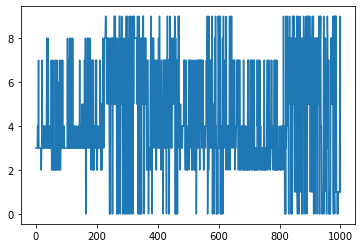

In [55]:
cluster_zoom = cluster[window_size//2+start-center:window_size//2+end-center]
plt.plot(cluster_zoom)

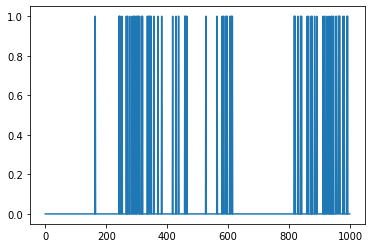

In [64]:
plt.plot(cluster_zoom==0)

In [71]:
from sklearn.ensemble import IsolationForest
outliers = IsolationForest().fit_predict(latent)
outliers.shape

(1000000,)

In [73]:
(outliers==-1).sum()

29105

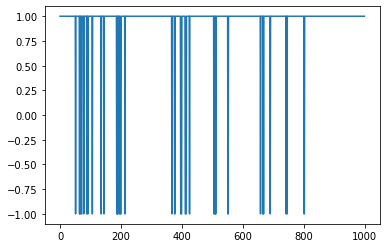

In [74]:
outliers_zoom = outliers[window_size//2+start-center:window_size//2+end-center]
plt.plot(outliers_zoom)

In [6]:
pca = latent[:, :2]
pca.shape

(1000, 2)

In [8]:
umap = UMAP(n_components=2).fit_transform(latent)
umap.shape

(1000, 2)

In [10]:
df = pd.DataFrame(dict(
    pos=np.arange(len(pca)),
    PC1=pca[:, 0],
    PC2=pca[:, 1],
    UMAP1=umap[:, 0],
    UMAP2=umap[:, 1],
    cluster=cluster,
))
df

,pos,PC1,PC2,UMAP1,UMAP2,cluster
0,0,50.100275,47.033956,-1.997581,-1.499112,0
1,1,-15.581747,58.113229,3.939169,1.259042,9
2,2,42.981641,48.829378,-1.950673,-1.527698,0
3,3,57.940017,44.216418,-1.919837,-1.565005,0
4,4,54.583325,44.338956,-2.005317,-1.508748,0
...,...,...,...,...,...,...
995,995,-54.021989,4.442022,15.721426,8.985989,5
996,996,37.537841,-38.226426,3.382890,-7.703012,8
997,997,-60.360278,-4.954267,15.443886,9.104552,5
998,998,-57.236034,-2.336900,15.399879,9.095137,5


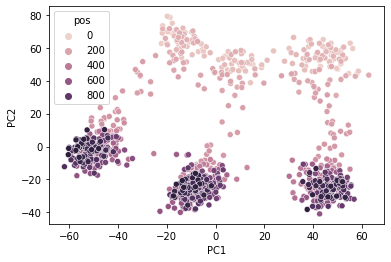

In [11]:
sns.scatterplot(data=df, x="PC1", y="PC2", hue="pos")

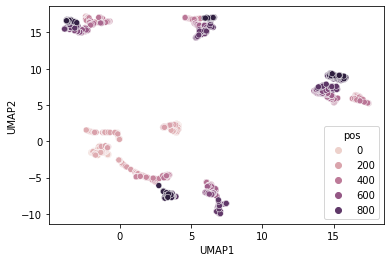

In [12]:
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="pos")

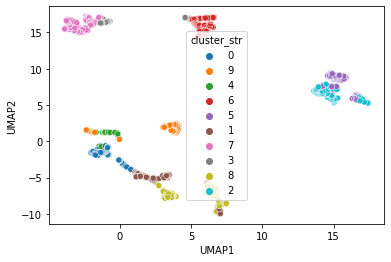

In [13]:
df["cluster_str"] = df.cluster.astype(str)
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="cluster_str")

In [17]:
gtf = pd.read_csv(
    "../../data/vep/tair10.gff", sep='\t', header=None, comment="#",
    names=['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
)
gtf = gtf[gtf.chromosome=="Chr5"]
gtf.shape

(135017, 9)

In [18]:
# To work with the already computed 1Mb embeddings
gtf = gtf[(gtf.start > center-window_size//2) & (gtf.end < center+window_size//2)]
gtf.start -= (center-window_size//2)
gtf.end -= (center-window_size//2)
gtf.shape

(6455, 9)

In [19]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
protein                       369
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
gene                          291
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [20]:
gtf = gtf[gtf.feature != "protein"]  # redundant
gtf = gtf[gtf.feature != "gene"]  # redundant
gtf.shape

(5795, 9)

In [21]:
#gtf.head(100).tail(50)

In [22]:
#df['gene_id'] = df.attribute.str.extract(r'gene_id "([^;]*)";')
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)"')  # the filtered versions need this
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)";')

In [23]:
# check code here: https://github.com/gonzalobenegas/DeepGTF/blob/main/scripts/gtf2fasta.py

In [24]:
overlaps = pd.Series(["Intergenic"] * window_size)
i = -1
for row_index, row in gtf.iterrows():
    i += 1
    if i % 1000 == 0: print(i)
    overlaps[row.start:row.end] += "," + row.feature
overlaps = overlaps.str.split(",").apply(Counter)

0
1000
2000
3000
4000
5000


In [25]:
overlaps.value_counts()

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                260409
{'Intergenic': 1, 'mRNA': 1}                                     149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                 52858
{'Intergenic': 1, 'mRNA': 2}                                      47920
                                                                  ...  
{'Intergenic': 1, 'mRNA': 4, 'exon': 4, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'exon': 3, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'three_prime_UTR': 2, 'exon': 3}         1
{'Intergenic': 1, 'exon': 2}                                          1
{'Intergenic': 1, 'mRNA': 3, 'five_prime_UTR': 1, 'exon': 2}          1
Length: 88, dtype: int64

In [26]:
overlaps.value_counts()[:20]

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                                  327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                                  260409
{'Intergenic': 1, 'mRNA': 1}                                                       149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                                   52858
{'Intergenic': 1, 'mRNA': 2}                                                        47920
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'three_prime_UTR': 1}                       40425
{'Intergenic': 1, 'mRNA': 3}                                                        22617
{'Intergenic': 1, 'mRNA': 3, 'CDS': 3, 'exon': 3}                                   20684
{'Intergenic': 1, 'mRNA': 1, 'five_prime_UTR': 1, 'exon': 1}                        19910
{'Intergenic': 1, 'mRNA': 4}                                                         7694
{'Intergenic': 1, 'mRNA': 2, 'three_prime_UTR': 2, 'exon': 2}                        6604
{'Intergen

In [189]:
segmentation = pd.Series([""] * window_size)
segmentation[overlaps==Counter(Intergenic=1)] = "intergenic"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1)] = "intron"  # technically should include all mRNA>=1
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, CDS=1)] = "cds"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, five_prime_UTR=1)] = "five_prime_utr"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, three_prime_UTR=1)] = "three_prime_utr"
#segmentation[overlaps==Counter(Intergenic=1, mRNA=2, exon=1, CDS=1)] = "alt_spliced_cds"  # again, could do mRNA>=1, etc.
segmentation.value_counts()

intergenic         327987
cds                260409
                   201961
intron             149308
three_prime_utr     40425
five_prime_utr      19910
dtype: int64

In [170]:
segmentation = segmentation[segmentation!=""]
n_train, n_test = 100, 1000
segmentation_subset = segmentation.groupby(segmentation).sample(n=n_train+n_test, random_state=42).to_frame().rename(columns={0: "Region"})
segmentation_subset

,Region
691077,cds
792305,cds
168813,cds
532498,cds
337741,cds
...,...
134606,three_prime_utr
330739,three_prime_utr
796382,three_prime_utr
253497,three_prime_utr


In [171]:
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
segmentation_subset["nucleotide"] = segmentation_subset.apply(lambda row: genome["Chr5"][row.name + center-window_size//2], axis=1)
segmentation_subset

,Region,nucleotide
691077,cds,G
792305,cds,C
168813,cds,C
532498,cds,T
337741,cds,C
...,...,...
134606,three_prime_utr,A
330739,three_prime_utr,G
796382,three_prime_utr,C
253497,three_prime_utr,G


In [172]:
embedding_subset = embedding[segmentation_subset.index.values]
embedding_subset.shape

(5500, 512)

In [144]:
segmentation_subset[["UMAP1", "UMAP2"]] = UMAP(n_components=2).fit_transform(embedding_subset)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

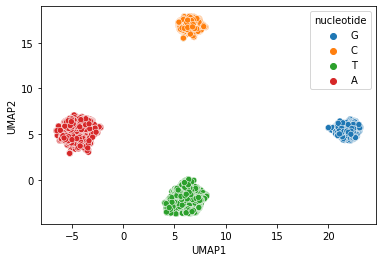

In [145]:
sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="nucleotide"
)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

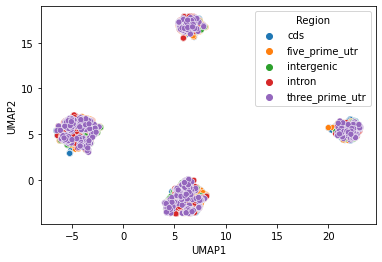

In [146]:
sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="Region"
)

In [147]:
segmentation_subset_A = segmentation_subset[segmentation_subset.nucleotide=='A'].copy()
segmentation_subset_A.drop(columns=["UMAP1", "UMAP2"])
embedding_subset_A = embedding[segmentation_subset_A.index.values]
embedding_subset_A.shape

(1645, 512)

In [148]:
segmentation_subset_A[["UMAP1", "UMAP2"]] = UMAP(n_components=2).fit_transform(embedding_subset_A)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

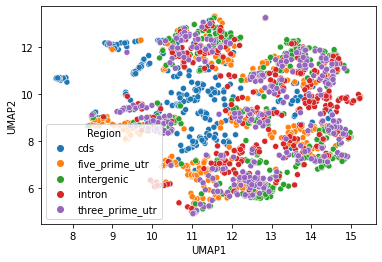

In [149]:
sns.scatterplot(
    data=segmentation_subset_A,
    x="UMAP1",
    y="UMAP2",
    hue="Region"
)

### Few-shot classification

In [190]:
segmentation = segmentation[segmentation!=""]
border = 10000
print(segmentation.shape)
segmentation = segmentation[border:-border]
print(segmentation.shape)
print(segmentation.value_counts())

(798039,)
(778039,)
intergenic         318549
cds                254251
intron             146106
three_prime_utr     39533
five_prime_utr      19600
dtype: int64


In [247]:
n_train, n_test = 10, 10000
assert(n_train+n_test < 19000)
segmentation_subset = segmentation.groupby(segmentation).sample(n=n_train+n_test, random_state=42).to_frame().rename(columns={0: "Region"})

aggregation = "mean"#"concat" #None
n_aggregation = 33#15#31 # None  # different categories benefit from different n_aggregation

if aggregation is None:
    embedding_subset = embedding[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)

In [248]:
embedding_subset.shape

(50050, 512)

In [249]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

X = embedding_subset
y = segmentation_subset.Region

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train*len(y.unique()), random_state=42, stratify=y)

In [250]:
# TODO: figure out if n_jobs works well

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LogisticRegressionCV(max_iter=10000, verbose=1, random_state=42, cv=10, Cs=100))
])

In [251]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.0s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 LogisticRegressionCV(Cs=100, cv=10, max_iter=10000,
                                      random_state=42, verbose=1))])

In [252]:
y_pred = clf.predict(X_test)

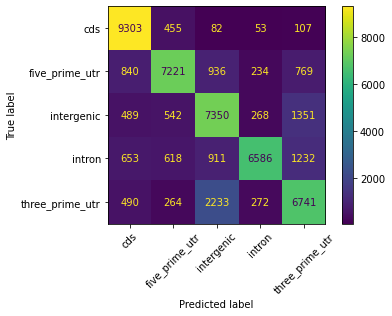

In [253]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=45);